# Q1

In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8792 sha256=14e8aaebb00163a6521544d1c8e870e94fd20374460a3eed3716cc45469c524e
  Stored in directory: /tmp/pip-ephem-wheel-cache-o3ckpcgm/wheels/4d/33/74/7c0903053e955973d5dc3d21857a29b3f8c0806ad0b05c32a1
Successfully built pathtools


In [2]:
!wandb --version

wandb, version 0.15.3


# Q2

In [3]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet -O data/green_tripdata_2022-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet -O data/green_tripdata_2022-02.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet -O data/green_tripdata_2022-03.parquet

--2023-06-04 14:08:00--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:2156:3200:b:20a5:b140:21, 2600:9000:2156:e000:b:20a5:b140:21, 2600:9000:2156:5200:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:2156:3200:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254291 (1,2M) [binary/octet-stream]
Saving to: ‘data/green_tripdata_2022-01.parquet’

data/green_tripdata 100%[===================>]   1,20M  2,39MB/s    in 0,5s    

2023-06-04 14:08:01 (2,39 MB/s) - ‘data/green_tripdata_2022-01.parquet’ saved [1254291/1254291]

--2023-06-04 14:08:01--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:2156:e000:b:20a5:b140:21, 2600:9000:2156:8600:b:20a5:b140:21, 2600:900

In [6]:
# before running the script run `wandb login` in terminal
!python ../../cohorts/2023/02-experiment-tracking/homework-wandb/preprocess_data.py \
    --wandb_project hw_2_wandb \
    --wandb_entity hca97 \
    --raw_data_path ./data \
    --dest_path ./data/output

wandb: Currently logged in as: hca97. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/cemmi/Documents/mlops-zoomcamp/mlops-zoomcamp/02-experiment-tracking/hw-solutions-wandb/wandb/run-20230604_141330-ng091rd9
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run sparkling-eon-1
wandb: ⭐️ View project at https://wandb.ai/hca97/hw_2_wandb
wandb: 🚀 View run at https://wandb.ai/hca97/hw_2_wandb/runs/ng091rd9
wandb: Adding directory to artifact (./data/output)... Done. 0.0s
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run sparkling-eon-1 at: https://wandb.ai/hca97/hw_2_wandb/runs/ng091rd9
wandb: Synced 6 W&B file(s), 0 media file(s), 6 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230604_141330-ng091rd9/logs


In [7]:
!ls -sh data/output/dv.pkl

152K data/output/dv.pkl


# Q3

In [10]:
!python ../../cohorts/2023/02-experiment-tracking/homework-wandb/train.py \
  --wandb_project hw_2_wandb \
  --wandb_entity hca97 \
  --data_artifact "hca97/hw_2_wandb/NYC-Taxi:v0"

wandb: Currently logged in as: hca97. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/cemmi/Documents/mlops-zoomcamp/mlops-zoomcamp/02-experiment-tracking/hw-solutions-wandb/wandb/run-20230604_141711-ox41xw3x
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run deep-pyramid-2
wandb: ⭐️ View project at https://wandb.ai/hca97/hw_2_wandb
wandb: 🚀 View run at https://wandb.ai/hca97/hw_2_wandb/runs/ox41xw3x
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run deep-pyramid-2 at: https://wandb.ai/hca97/hw_2_wandb/runs/ox41xw3x
wandb: Synced 6 W&B file(s), 0 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230604_141711-ox41xw3x/logs


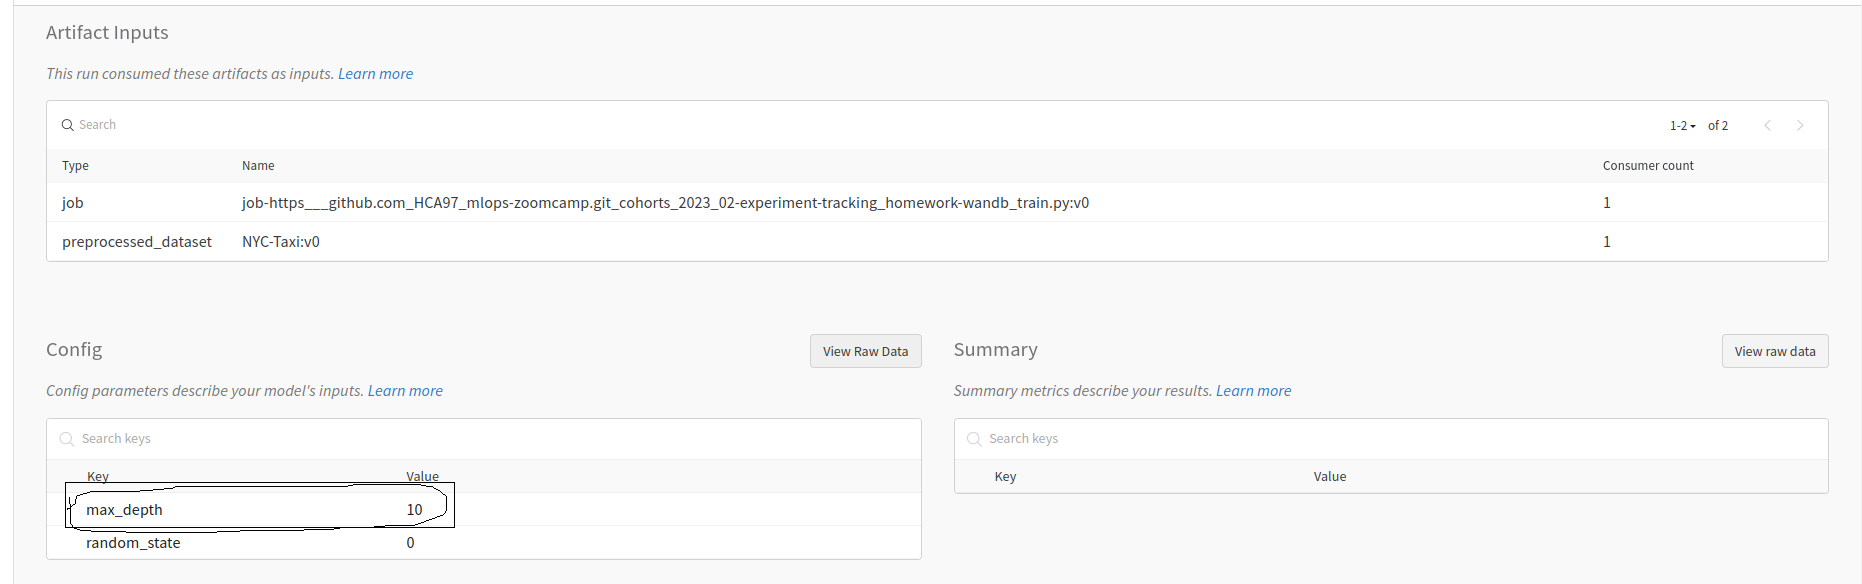

In [11]:
from PIL import Image
im = Image.open("q3_maxdepth.png")
im

# Q4

In [12]:
!python ../../cohorts/2023/02-experiment-tracking/homework-wandb/sweep.py \
  --wandb_project hw_2_wandb \
  --wandb_entity hca97 \
  --data_artifact "hca97/hw_2_wandb/NYC-Taxi:v0"

Create sweep with ID: kalu58kp
Sweep URL: https://wandb.ai/hca97/hw_2_wandb/sweeps/kalu58kp
wandb: Agent Starting Run: fet5xwr1 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 20
wandb: Currently logged in as: hca97. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/cemmi/Documents/mlops-zoomcamp/mlops-zoomcamp/02-experiment-tracking/hw-solutions-wandb/wandb/run-20230604_142344-fet5xwr1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run lunar-sweep-1
wandb: ⭐️ View project at https://wandb.ai/hca97/hw_2_wandb
wandb: 🧹 View sweep at https://wandb.ai/hca97/hw_2_wandb/sweeps/kalu58kp
wandb: 🚀 View run at https://wandb.ai/hca97/hw_2_wandb/runs/fet5xwr1
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb: MSE ▁
wandb: 
wandb: Run summary:
wandb: MSE 2.4607
w

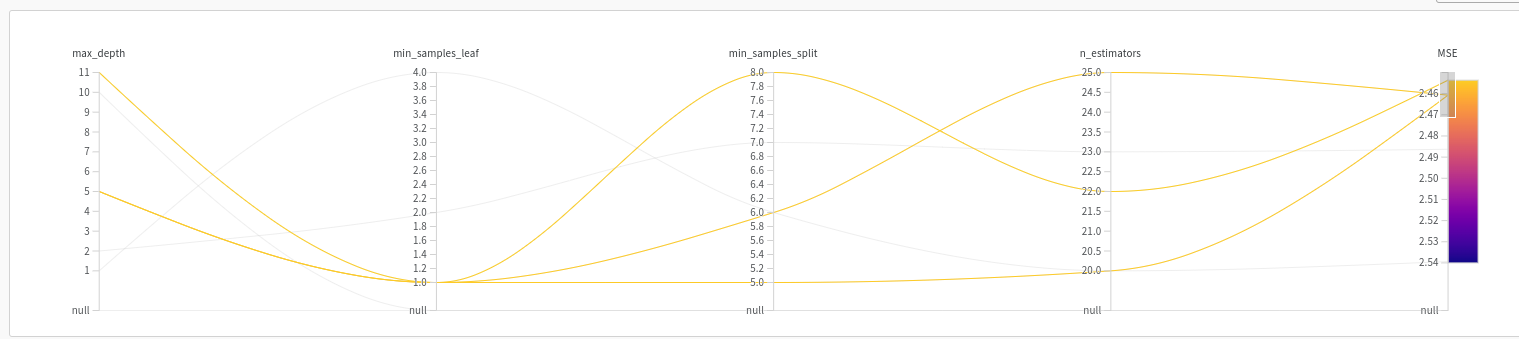

In [13]:
from PIL import Image
im = Image.open("q4_most_important_feature.png")
im

# Q5

In [19]:
import wandb

with wandb.init(project="hw_2_wandb") as run:
    # get the best model
    artifact = run.use_artifact('hca97/hw_2_wandb/su5pn9j1-model:latest', type='model')
    # create the model registry
    run.link_artifact(artifact, 'hca97/model-registry/hw2-wandb-v2')
    